This propgram will be used to help a person to track their income, costs,expenses, taxes and financial costs

Import libraries

In [1]:
import pandas as pd
import datetime
from datetime import datetime
import os.path as path
import matplotlib.pyplot as plt
import seaborn

Look for file and create if not there

In [2]:
if path.exists('/content/drive/MyDrive/income.csv'):
   income = pd.read_csv('/content/drive/MyDrive/income.csv', header=0)
else:
   columns = ['date','type_trans','amount', 'add_or_subtract']
   income = pd.DataFrame(columns=columns)

While loop

In [3]:
action = ''

while action != 'Q':
  action = str(input("Enter what you want to do with the dataframe: 'A' for add, 'D' for delete, 'P' for print, 'S' for sort, or 'Q' for quit: ")).upper()
  if action == 'A':
    date = input('Enter date of transaction (i.e. 2021,7,1): ')
    year, month, day = map(int, date.split(','))
    trans_date = datetime(year, month, day)
    trans_date = str(trans_date)
    trans_date = trans_date[:10]
    transaction = str(input("Enter the type of transaction: 'I' for income, 'C' for cost, 'E' for expense, 'T' for tax, 'F' for finance: ")).upper()
    if transaction == 'I': type_tran = 'income'
    elif transaction == 'C': type_tran = 'cost_of_sale'
    elif transaction == 'E': type_tran = 'expense_of_bus'
    elif transaction == 'T': type_tran = 'tax'
    elif transaction == 'F': type_tran = 'finance'
    else: continue
    amount = input("Please enter the amount of this transaction, such as XXX.XX: ")
    amount = float(amount)
    calculate = str(input("Enter whether this amount should be added or subtracted: 'A' for add or 'S' for subtract")).upper()
    if calculate == 'A': calculate = 'add'
    elif calculate == 'S': 
      calculate = 'subtract'
      amount = 0 - amount
    else: continue
    income = income.append({'date': trans_date, 'type_trans': type_tran, 'amount': amount, 'add_or_subtract': calculate}, ignore_index=True)
  elif action == 'D':
    del_no = input("Please enter the index number of the transaction you would like to delete: ")
    del_no = int(del_no)
    income.drop([del_no], inplace=True)
  elif action == 'P': print(income)
  elif action == 'S':
    sorted = input("Please enter how you want the list sorted: 'D' for date or 'T' for transaction type ").upper()
    if sorted == 'D': income = income.sort_values(by='date')
    elif sorted == 'T': income = income.sort_values(by='type_trans')
  elif action == 'Q': break
  else: continue


Enter what you want to do with the dataframe: 'A' for add, 'D' for delete, 'P' for print, 'S' for sort, or 'Q' for quit: a
Enter date of transaction (i.e. 2021,7,1): 2021,4,10
Enter the type of transaction: 'I' for income, 'C' for cost, 'E' for expense, 'T' for tax, 'F' for finance: i
Please enter the amount of this transaction, such as XXX.XX: 600
Enter whether this amount should be added or subtracted: 'A' for add or 'S' for subtracta
Enter what you want to do with the dataframe: 'A' for add, 'D' for delete, 'P' for print, 'S' for sort, or 'Q' for quit: p
         date      type_trans  amount add_or_subtract
0  2021-04-07          income  1000.0             add
1  2021-04-08             tax   -20.0        subtract
2  2021-04-07    cost_of_sale  -600.0        subtract
3  2021-04-08          income   500.0             add
4  2021-04-08         finance   -20.0        subtract
5  2021-04-08  expense_of_bus  -100.0        subtract
6  2021-04-10          income   600.0             add
Ente

Analyse dataframe

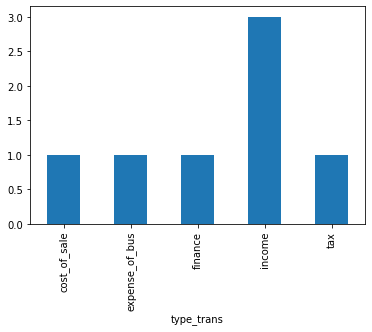

In [4]:
income.groupby('type_trans').type_trans.count().plot.bar(ylim=0)
plt.show()

Prepare income statement

In [5]:
print(income)

revenue = income.loc[income['type_trans'] == 'income', 'amount'].sum()
cost_of_sales = income.loc[income['type_trans'] == 'cost_of_sale', 'amount'].sum() 
gross_income = revenue + cost_of_sales
expenses =  income.loc[income['type_trans'] == 'expense_of_bus', 'amount'].sum()
fin_costs = income.loc[income['type_trans'] == 'finance', 'amount'].sum() 
taxation = income.loc[income['type_trans'] == 'tax', 'amount'].sum()
net_income = revenue + cost_of_sales + expenses + fin_costs + taxation


         date      type_trans  amount add_or_subtract
0  2021-04-07          income  1000.0             add
1  2021-04-08             tax   -20.0        subtract
2  2021-04-07    cost_of_sale  -600.0        subtract
3  2021-04-08          income   500.0             add
4  2021-04-08         finance   -20.0        subtract
5  2021-04-08  expense_of_bus  -100.0        subtract
6  2021-04-10          income   600.0             add


Print income statement

In [6]:
print("Statement of Income and Expenses")
print("Revenue         ",          revenue)
print("Cost of sales   ",    cost_of_sales)
print("______________________________________________")
print("Gross income    ",     gross_income)
print("Expenses        ",         expenses)
print("Finance costs   ",    fin_costs)
print("Taxation        ",         taxation)
print("______________________________________________")
print("Net income      ",       net_income)

Statement of Income and Expenses
Revenue          2100.0
Cost of sales    -600.0
______________________________________________
Gross income     1500.0
Expenses         -100.0
Finance costs    -20.0
Taxation         -20.0
______________________________________________
Net income       1360.0


Convert file to csv

In [7]:
income.to_csv('/content/drive/MyDrive/income.csv', index = False)
income = pd.read_csv('/content/drive/MyDrive/income.csv')
print(income)

         date      type_trans  amount add_or_subtract
0  2021-04-07          income  1000.0             add
1  2021-04-08             tax   -20.0        subtract
2  2021-04-07    cost_of_sale  -600.0        subtract
3  2021-04-08          income   500.0             add
4  2021-04-08         finance   -20.0        subtract
5  2021-04-08  expense_of_bus  -100.0        subtract
6  2021-04-10          income   600.0             add
